In [1]:
%matplotlib inline
import loompy
import logging
import pandas as pd
import numpy as np
import cytograph as cg
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import *
from sklearn.metrics.pairwise import cosine_distances
import numpy_groupies as npg
import matplotlib.pyplot as plt

/Users/sten/anaconda3/lib/python3.6/site-packages/numba/decorators.py:149: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [2]:
d = "/Users/stelin/Dropbox (Linnarsson Group)/Shared/C1_striatum/Wafergen_exp_Striatum_June2017/oct_2017/20171020/"
anns = "cell_annotation_WG_striatum_FinaleClusters_20-Oct-2017.txt"
moldata = "moldata_WG_striatum_FinalCluster_no_annot_20-Oct-2017.txt"

In [3]:
pdanns = pd.read_csv(d+anns, sep="\t",index_col=0,header=None).transpose()
pdmoldata = pd.read_csv(d+moldata, sep=",",index_col=0,header=0).transpose()

In [4]:
genes = pdmoldata.transpose().index.values

In [5]:
genes

array(['marker-DsRed', 'marker-GFP', 'Mrpl15', ..., 'Uty', 'Ddx3y', 'Erdr1'], dtype=object)

In [6]:
loompy.create(d + "WG_striatum.loom", pdmoldata.values.transpose(), row_attrs={"Gene": genes}, col_attrs=pdanns.to_dict(orient="list"))

2018-04-08 14:44:38,375 INFO: Feature selection
2018-04-08 14:44:39,120 INFO: Normalization
2018-04-08 14:44:41,176 INFO: Feature selection
2018-04-08 14:44:41,177 INFO: Computing enrichment statistic
2018-04-08 14:44:46,849 INFO: PCA projection


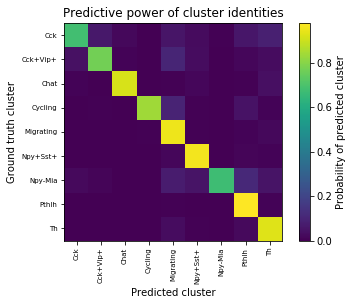

In [12]:
with loompy.connect(d + "WG_striatum.loom") as ds:
    ds.ca.ClusterName = ds.ca.grLev2
    ds.ca.Clusters = LabelEncoder().fit_transform(ds.ca.ClusterName)
    cv = cg.ClusterValidator()
    cv.fit(ds, d + "validation.pdf")

In [13]:
print(cv.report)

             precision    recall  f1-score   support

        Cck       1.00      0.57      0.73         7
   Cck+Vip+       0.50      1.00      0.67         1
       Chat       1.00      1.00      1.00        11
    Cycling       1.00      0.87      0.93        15
  Migrating       0.98      0.94      0.96       158
   Npy+Sst+       1.00      0.99      1.00       113
    Npy-Mia       1.00      1.00      1.00         1
      Pthlh       0.96      1.00      0.98       265
         Th       0.91      0.94      0.93       113

avg / total       0.97      0.96      0.96       684

